## Exercise 4

<strong>1. Plotting original data</strong>

This cell is used to plot the original data after splitting it
into a training and test set.


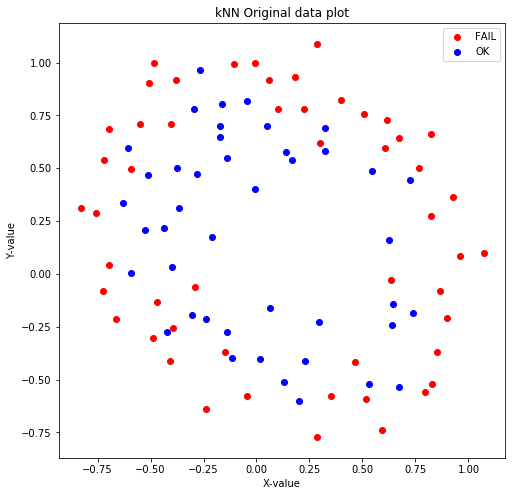

In [1]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from os import path

data = np.genfromtxt(path.join('data/microchips.csv'), delimiter=',', dtype=float)
plt.rcParams["figure.figsize"] = (10,10) # scale plots
# split data into trainging set and test set
X_train, X_test, y_train, y_test, Z_train, Z_test = train_test_split(data[:, 0], data[:, 1], data[:, 2],
                                                                     test_size=0.2,
                                                                     random_state=10)  # using 10 as seed
merged_train_set = np.array([X_train, y_train, Z_train]).T

failed = list(filter(lambda chip: chip[2] == 0, merged_train_set))
ok = list(filter(lambda chip: chip[2] == 1, merged_train_set))

xf, yf, zf = list(zip(*failed))
plt.scatter(xf, yf, color='r')
x, y, z = list(zip(*ok))
plt.scatter(x, y, color='b')

plt.xlabel('X-value')
plt.ylabel('Y-value')
plt.legend(['FAIL', 'OK'])
plt.title("kNN Original data plot")
plt.show()


<strong>2. Decision boundary and predictions</strong>

This cell uses SKlearn to fit a model to the training data and then makes predictions on the mesh,
training set and a few custom chips.


k=1
Chip 1 ==>  1
Chip 2 ==>  0
Chip 3 ==>  0
k=3
Chip 1 ==>  0
Chip 2 ==>  1
Chip 3 ==>  1
k=5
Chip 1 ==>  0
Chip 2 ==>  1
Chip 3 ==>  1
k=7
Chip 1 ==>  0
Chip 2 ==>  0
Chip 3 ==>  1


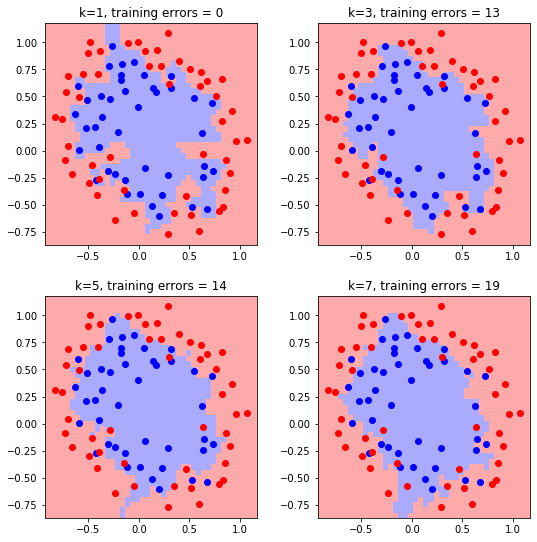

In [3]:
# Prepare mesh
h = .05  # Mesh step size

# Plotting decision regions
x_min, x_max = data[:, 0].min() - 0.1, data[:, 0].max() + 0.1  # slice array (0-118, col 0)
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1  # slice array (0-118, col 1)

# Set up mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
xy_mesh = np.c_[xx.ravel(), yy.ravel()]  # Turn to Nx2 matrix

# Mesh plot colors
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Create microchips to compare
chip_1 = np.array([[-0.3, 1.0]])
chip_2 = np.array([[-0.5, -0.1]])
chip_3 = np.array([[0.6, 0.0]])

# Prepared train data
prepared = np.array([X_train, y_train]).T

# Predict
for k in [1, 3, 5, 7]:
    print(f"k={k}")
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(prepared, Z_train.T)
    print("Chip 1 ==> ", int(model.predict(chip_1)[0]))
    print("Chip 2 ==> ", int(model.predict(chip_2)[0]))
    print("Chip 3 ==> ", int(model.predict(chip_3)[0]))


# Create subplots
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.tight_layout(pad=3.0)
figNr = 1
for k in [1, 3, 5, 7]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(prepared, Z_train.T)
    errors = len(prepared) - (model.score(prepared, Z_train.T)*len(prepared))  # Ex: nrErrors = Total - Accuracy * Total
    classes = model.predict(xy_mesh)  # classify mesh
    clz_mesh = classes.reshape(xx.shape)  # Return to mesh shape
    ax = plt.subplot(2, 2, figNr)  # Create subplot n

    ax.set_title("k=%i, training errors = %i" % (k, errors), )  # title
    # Subplots
    figNr += 1
    ax.pcolormesh(xx, yy, clz_mesh, cmap=cmap_light)
    ax.scatter(x, y, color='b')
    ax.scatter(xf, yf, color='r')

plt.show()